In [7]:
import pandas as pd


In [8]:

# Replace 'filename.csv' with your file path
df = pd.read_csv('test_results.csv')
df["total_duration"] = df.fit_duration + df.transform_duration

df

,transformer,num_samples,fit_duration,transform_duration,total_duration
0,Numpy,100000,0.071618,1.628145,1.699763
1,NumbaV0,100000,0.069865,4.967856,5.037722
2,NumbaV1,100000,2.377974,1.482851,3.860825
3,Cython,100000,0.077428,0.137612,0.215040
4,Numpy,200000,0.113689,2.409696,2.523385
5,NumbaV0,200000,0.128567,4.078080,4.206647
6,NumbaV1,200000,2.495106,1.771698,4.266804
7,Cython,200000,0.116187,0.252448,0.368635
8,Numpy,400000,0.215978,10.905539,11.121517
9,NumbaV0,400000,0.215075,5.696303,5.911378


In [9]:
results = []
for grp in df.groupby('num_samples'):
    df_g = grp[1]
    print(df_g)
    df_g["total_speedup"] = df_g[df_g.transformer == "Numpy"]["total_duration"].values[0] / df_g["total_duration"]
    results.append(df_g)

results_df = pd.concat(results)
# results_df = results_df[results_df.num_samples != 1000]
results_df

  transformer  num_samples  fit_duration  transform_duration  total_duration
0       Numpy       100000      0.071618            1.628145        1.699763
1     NumbaV0       100000      0.069865            4.967856        5.037722
2     NumbaV1       100000      2.377974            1.482851        3.860825
3      Cython       100000      0.077428            0.137612        0.215040
  transformer  num_samples  fit_duration  transform_duration  total_duration
4       Numpy       200000      0.113689            2.409696        2.523385
5     NumbaV0       200000      0.128567            4.078080        4.206647
6     NumbaV1       200000      2.495106            1.771698        4.266804
7      Cython       200000      0.116187            0.252448        0.368635
   transformer  num_samples  fit_duration  transform_duration  total_duration
8        Numpy       400000      0.215978           10.905539       11.121517
9      NumbaV0       400000      0.215075            5.696303        5.911

,transformer,num_samples,fit_duration,transform_duration,total_duration,total_speedup
0,Numpy,100000,0.071618,1.628145,1.699763,1.000000
1,NumbaV0,100000,0.069865,4.967856,5.037722,0.337407
2,NumbaV1,100000,2.377974,1.482851,3.860825,0.440259
3,Cython,100000,0.077428,0.137612,0.215040,7.904397
4,Numpy,200000,0.113689,2.409696,2.523385,1.000000
5,NumbaV0,200000,0.128567,4.078080,4.206647,0.599857
6,NumbaV1,200000,2.495106,1.771698,4.266804,0.591399
7,Cython,200000,0.116187,0.252448,0.368635,6.845219
8,Numpy,400000,0.215978,10.905539,11.121517,1.000000
9,NumbaV0,400000,0.215075,5.696303,5.911378,1.881375


This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
This patch is part of the bar plot.
1 (-0.4, 0)
2 (0.6, 0)
3 (1.5999999999999999, 0)
4 (2.6, 0)
5 (-0.19999999999999998, 0)
6 (0.8, 0)
7 (1.7999999999999998, 0)
8 (2.8, 0)
9 (-2.7755575615628914e-17, 0)
10 (1.0, 0)
11 (2.0, 0)
12 (3.0, 0)
13 (0.20000000000000004, 0)
14 (1.2, 0)
15 (2.1999999999999997, 0)
16 (3.1999

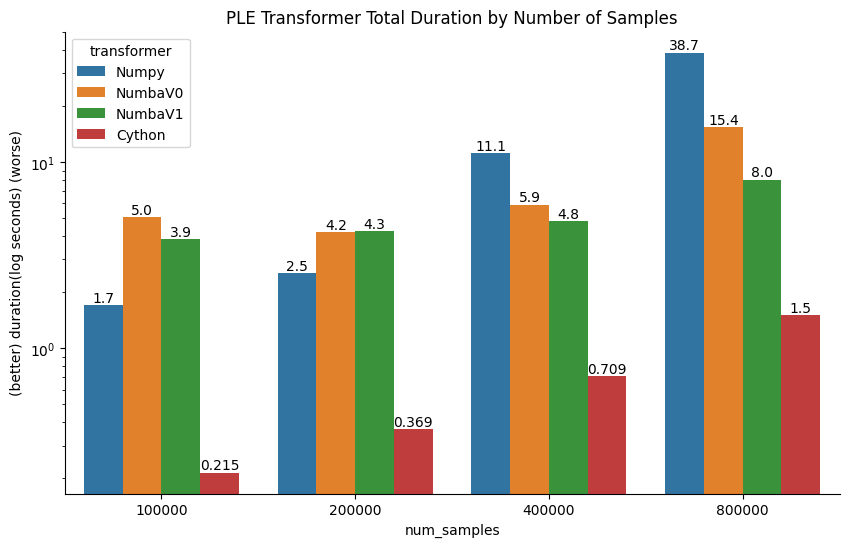

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='num_samples', y='total_duration', hue='transformer', data=results_df)

for p in barplot.patches:
    if p in barplot.patches:
        print("This patch is part of the bar plot.")
    else:
        print("This patch is not part of the bar plot.")

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 16:
        break
    print(p_id, p.get_xy())
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write the value on top of the bar
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.3f}'.format(height) if height < 1 else '{:.1f}'.format(height),
                 ha='center', va='bottom')


sns.despine()  # Remove the top and right spines from plot

plt.yscale('log')
plt.ylabel('(better) duration(log seconds) (worse)')
plt.title('PLE Transformer Total Duration by Number of Samples')
plt.savefig('ple_transformer_total_duration.png')
plt.show()

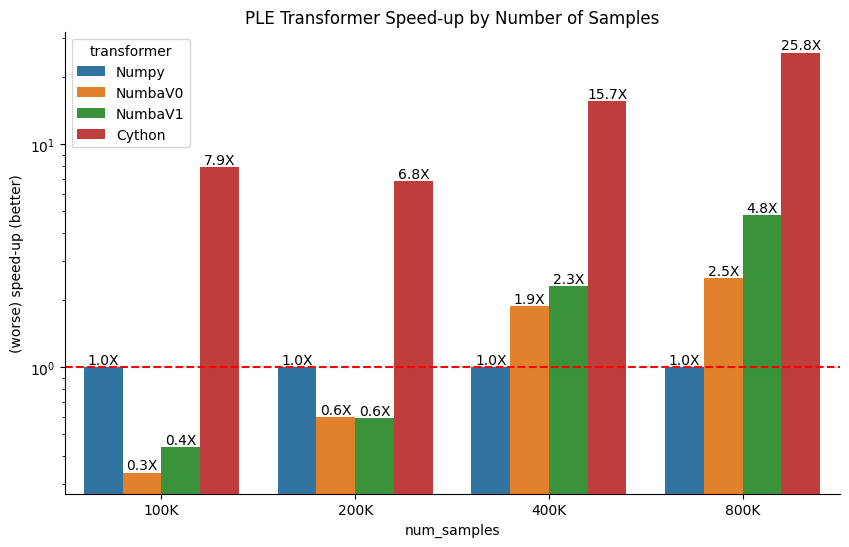

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='num_samples', y='total_speedup', hue='transformer', data=results_df)

plt.axhline(1, color='r', linestyle='--')  # Add this line

sns.despine()  # Remove the top and right spines from plot

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 16:
        break
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write the value on top of the bar
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.1f}'.format(height) + "X",
                 ha='center', va='bottom')

plt.ylabel('(worse) speed-up (better)')
plt.yscale('log')

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)


plt.title('PLE Transformer Speed-up by Number of Samples')
plt.savefig('ple_transformer_speedup.png')
plt.show()

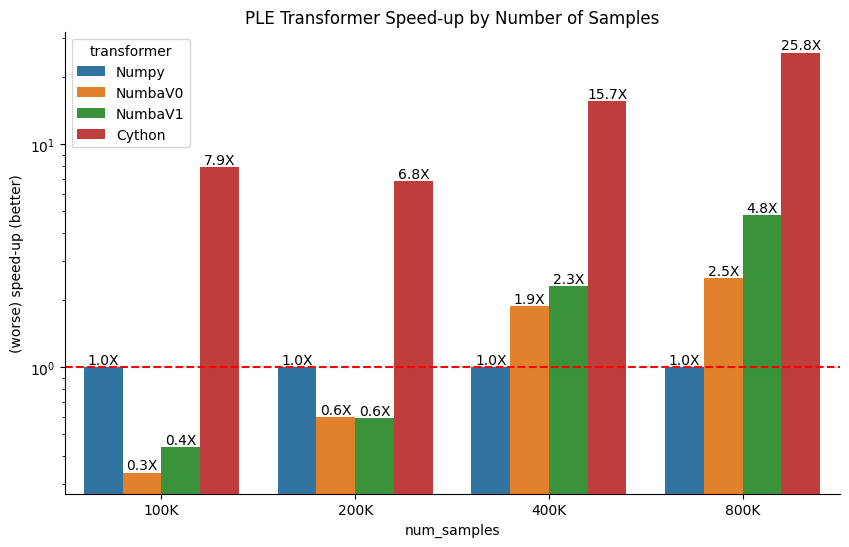

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='num_samples', y='total_speedup', hue='transformer', data=results_df)

plt.axhline(1, color='r', linestyle='--')

sns.despine()

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 16:
        break
    height = p.get_height()
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.1f}'.format(height) + "X",
                 ha='center', va='bottom')

plt.ylabel('(worse) speed-up (better)')
plt.yscale('log')
plt.title('PLE Transformer Speed-up by Number of Samples')

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)

plt.savefig('ple_transformer_speedup.png')
plt.show()